# Consumption Prediction

## Introduction

This workspace aims to develop a model to predict the consumption of gate food in airlines

1. Cargar los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_excel('ConsumptionPrediction_Dataset_v1.xlsx', sheet_name='Sheet1')
df.head()

,Flight_ID,Origin,Date,Flight_Type,Service_Type,Passenger_Count,Product_ID,Product_Name,Standard_Specification_Qty,Quantity_Returned,Quantity_Consumed,Unit_Cost,Crew_Feedback
0,AM109,DOH,2025-09-26,medium-haul,Retail,272,BRD001,Bread Roll Pack,62,7,55,0.35,NaN
1,AM109,DOH,2025-09-26,medium-haul,Retail,272,CRK075,Butter Cookies 75g,74,14,60,0.75,NaN
2,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK023,Sparkling Water 330ml,125,30,95,0.45,NaN
3,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK024,Still Water 500ml,110,19,91,0.50,NaN
4,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,BRD001,Bread Roll Pack,177,58,119,0.35,NaN


2. Visualizar los datos

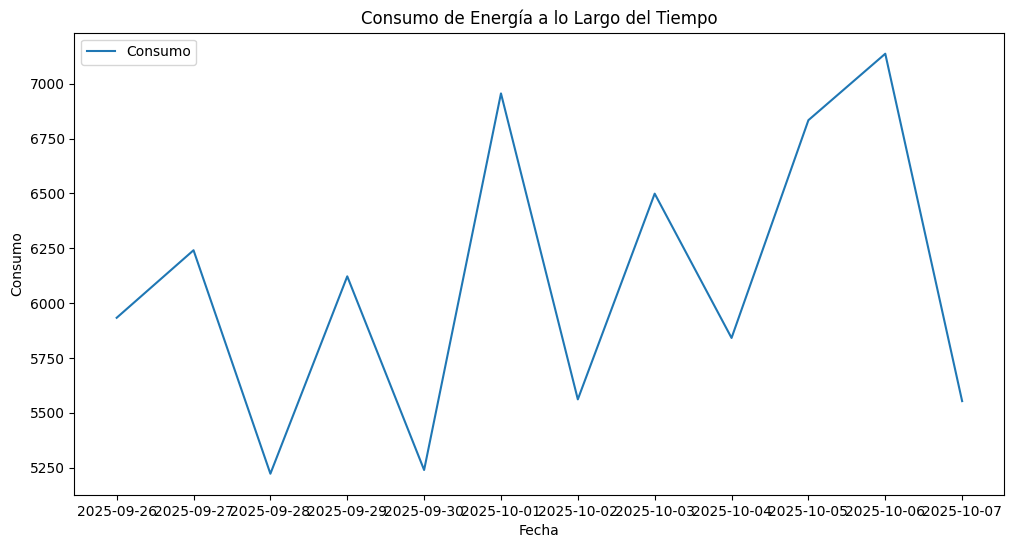

In [6]:
# Visualizar los datos agrupados por fecha
df_grouped = df.groupby('Date').sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Quantity_Consumed'], label='Consumo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Consumo de Energía a lo Largo del Tiempo')
plt.legend()
plt.show()

3. Feature Engineering

Se van a crear nuevas variables numéricas

1. Flight Type
    1. short = 1
    2. medium = 2
    3. long = 3

In [ ]:
def flight_type_to_numeric(flight_type):
    if flight_type == 'short-haul':
        return 1
    elif flight_type == 'medium-haul':
        return 2
    elif flight_type == 'long-haul':
        return 3
    else:
        return 0  # Valor por defecto para tipos desconocidos
    
df['Flight_Type_Numeric'] = df['Flight_Type'].apply(flight_type_to_numeric)
df.head()

,Flight_ID,Origin,Date,Flight_Type,Service_Type,Passenger_Count,Product_ID,Product_Name,Standard_Specification_Qty,Quantity_Returned,Quantity_Consumed,Unit_Cost,Crew_Feedback,Flight_Type_Numeric
0,AM109,DOH,2025-09-26,medium-haul,Retail,272,BRD001,Bread Roll Pack,62,7,55,0.35,NaN,0
1,AM109,DOH,2025-09-26,medium-haul,Retail,272,CRK075,Butter Cookies 75g,74,14,60,0.75,NaN,0
2,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK023,Sparkling Water 330ml,125,30,95,0.45,NaN,0
3,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK024,Still Water 500ml,110,19,91,0.50,NaN,0
4,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,BRD001,Bread Roll Pack,177,58,119,0.35,NaN,0
